In [24]:
#libreries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#
import functions as f

In [10]:
data = pd.read_csv("Data/ParisHousing.csv")
data.head(5)

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


In [19]:
cat_columns, num_columns = f.identify_column_types(data)
print("Categorical columns: ", cat_columns)
print("Numerical columns: ", num_columns)

Categorical columns:  []
Numerical columns:  ['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors', 'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt', 'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom', 'hasGuestRoom', 'price']


In [20]:
data.dtypes 

squareMeters           int64
numberOfRooms          int64
hasYard                int64
hasPool                int64
floors                 int64
cityCode               int64
cityPartRange          int64
numPrevOwners          int64
made                   int64
isNewBuilt             int64
hasStormProtector      int64
basement               int64
attic                  int64
garage                 int64
hasStorageRoom         int64
hasGuestRoom           int64
price                float64
dtype: object

We have to change, because same of the categorical featuresa appear as numerical

Para poder realizar predicciones de valor, un paso importante es el procesamiento de los datos para que nos aseguremos de la calidad de los mismos.

El primer paso es analisis de **valores ausentes**

In [8]:
print(data.isnull().sum())

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64


Podemos observar como no encontramos ninguna valor ausente en ningana de las columnas. 

The next step is to verify if we have any outlier in our data

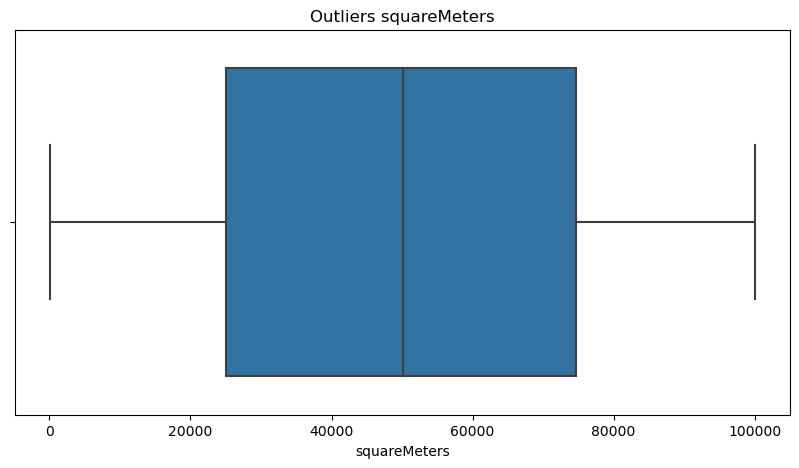

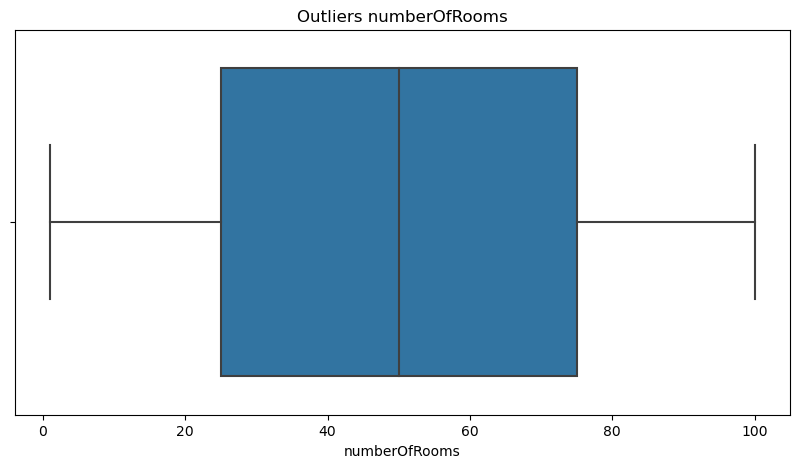

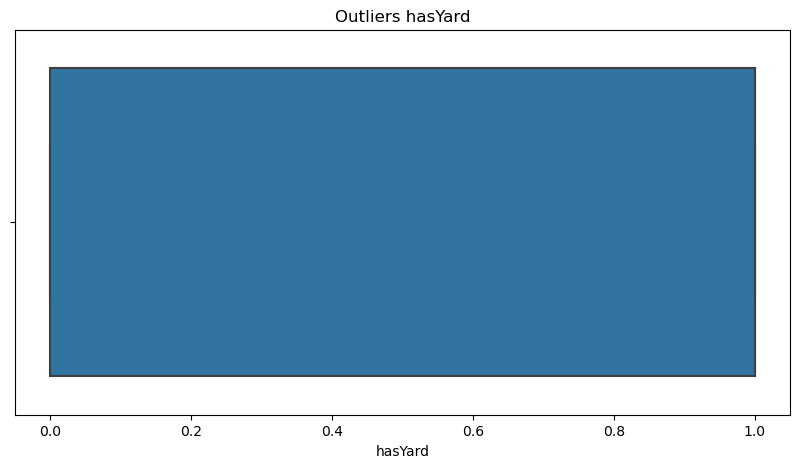

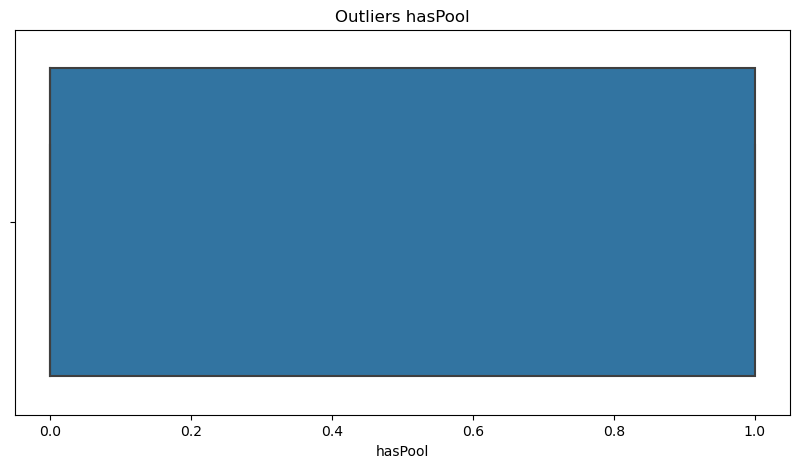

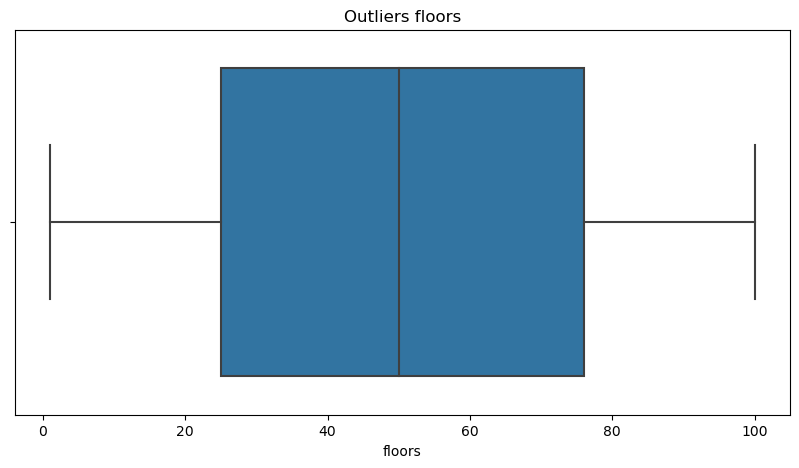

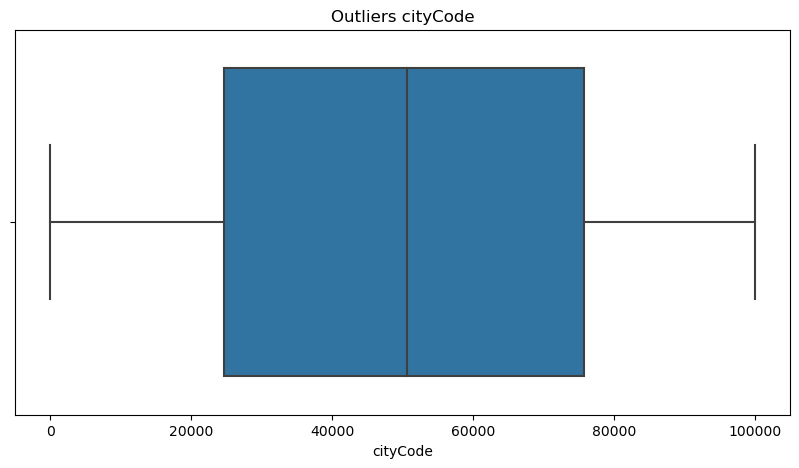

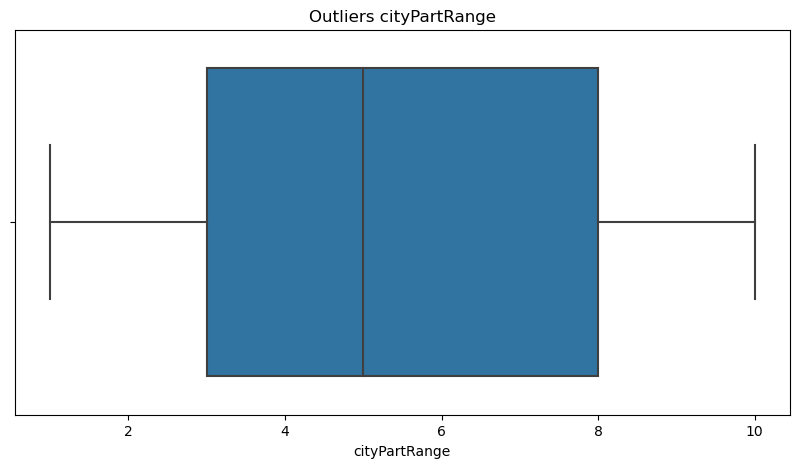

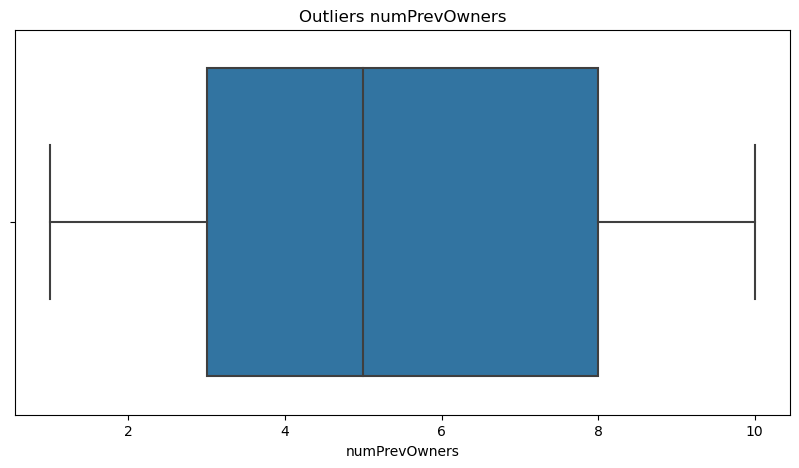

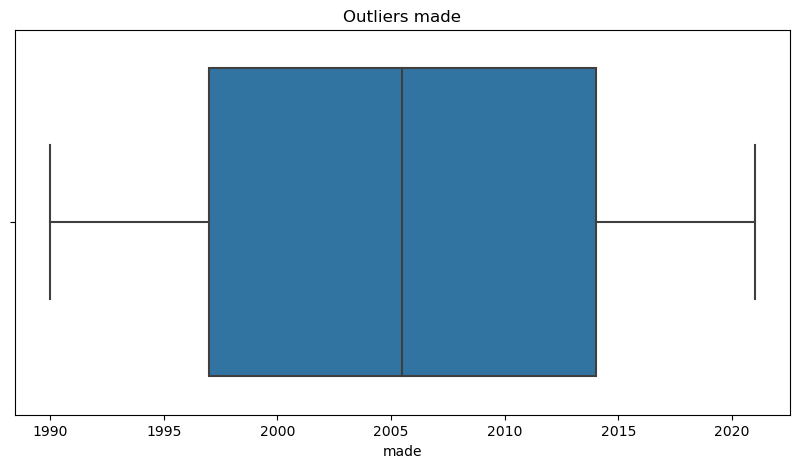

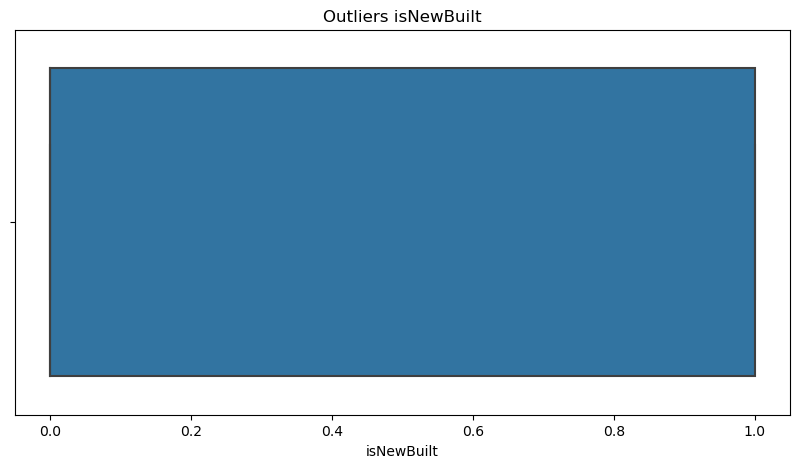

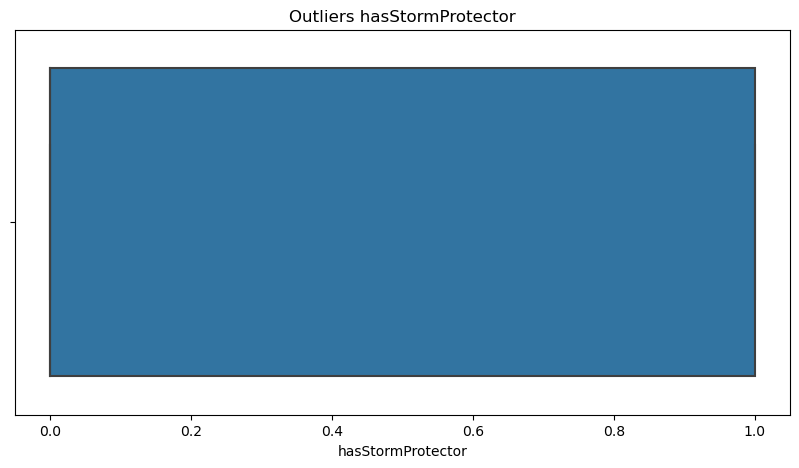

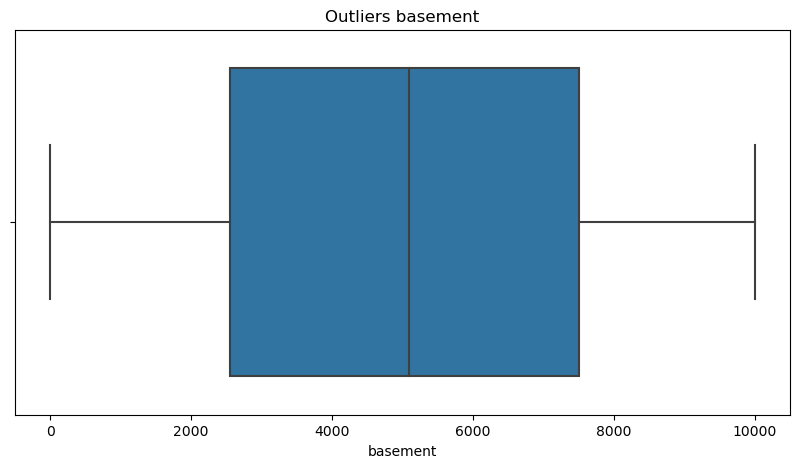

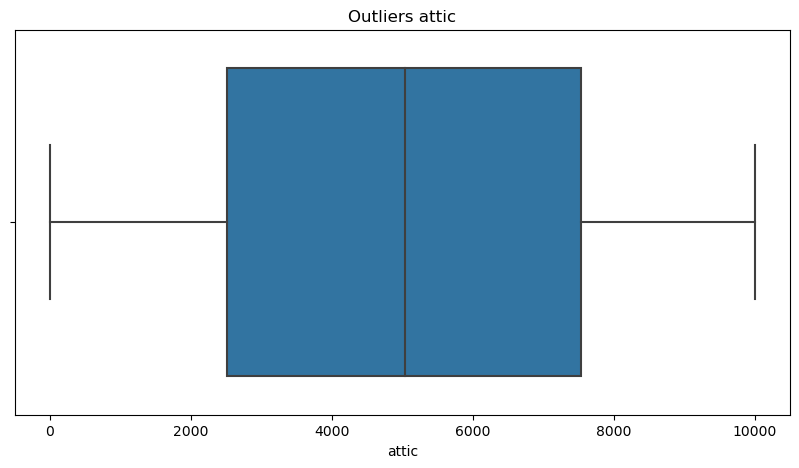

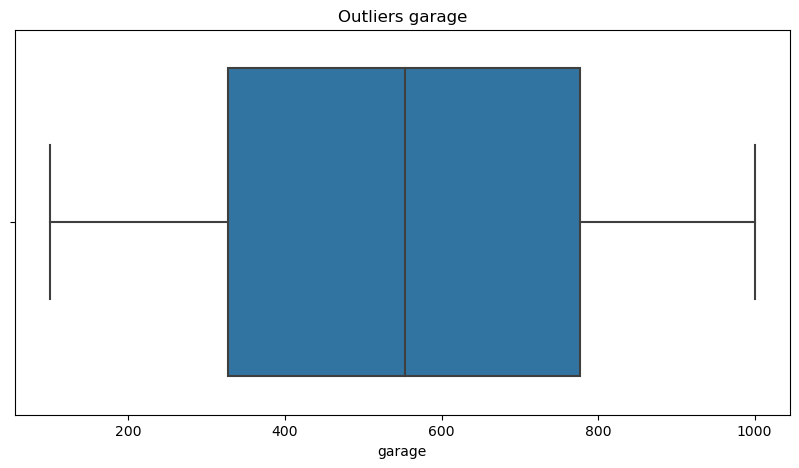

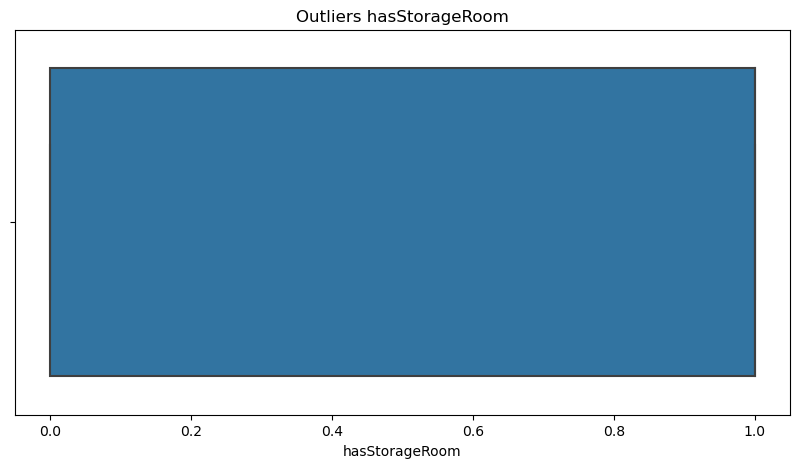

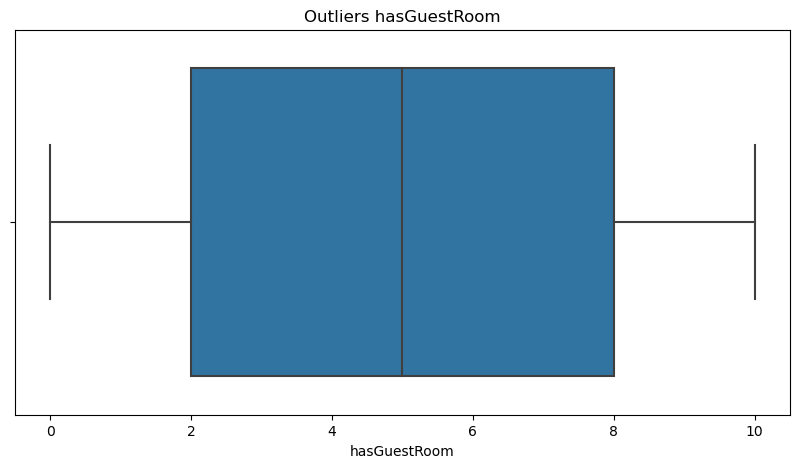

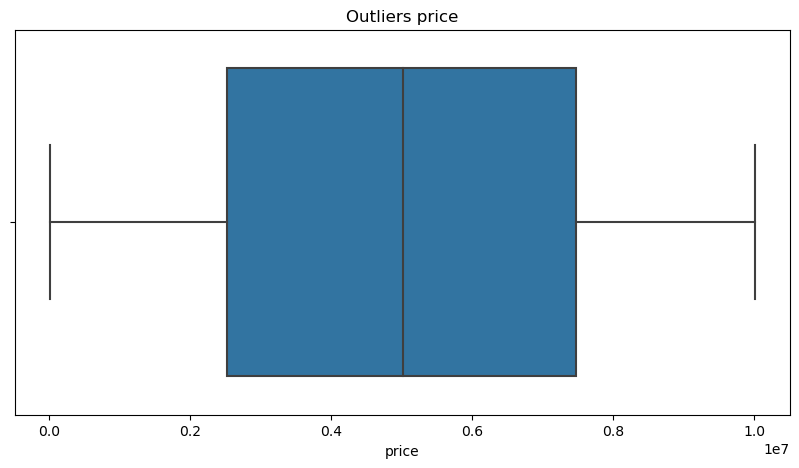

In [25]:

numeric_columns = data.select_dtypes(include=np.number).columns
for col in numeric_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=data, x=col)
    plt.title(f'Outliers {col}')
    plt.show()